# Importing Eye Tracking data with MNE-Python

In [1]:
import mne
import matplotlib.pyplot as plt

from almirah import Layout

mne.set_log_level(False)

In [2]:
lay = Layout(root="/path/to/data", specification_name="bids")
lay

<Layout root: '/path/to/data'>

In [4]:
files = lay.query(datatype="eyetrack", extension=".asc")
len(files)

3632

In [5]:
file = lay.query(subject="D0019", datatype="eyetrack", task="FIX", extension=".asc")[0]

print(file.rel_path)

sub-D0019/ses-111/eyetrack/sub-D0019_ses-111_task-FIX_run-01_eyetrack.asc


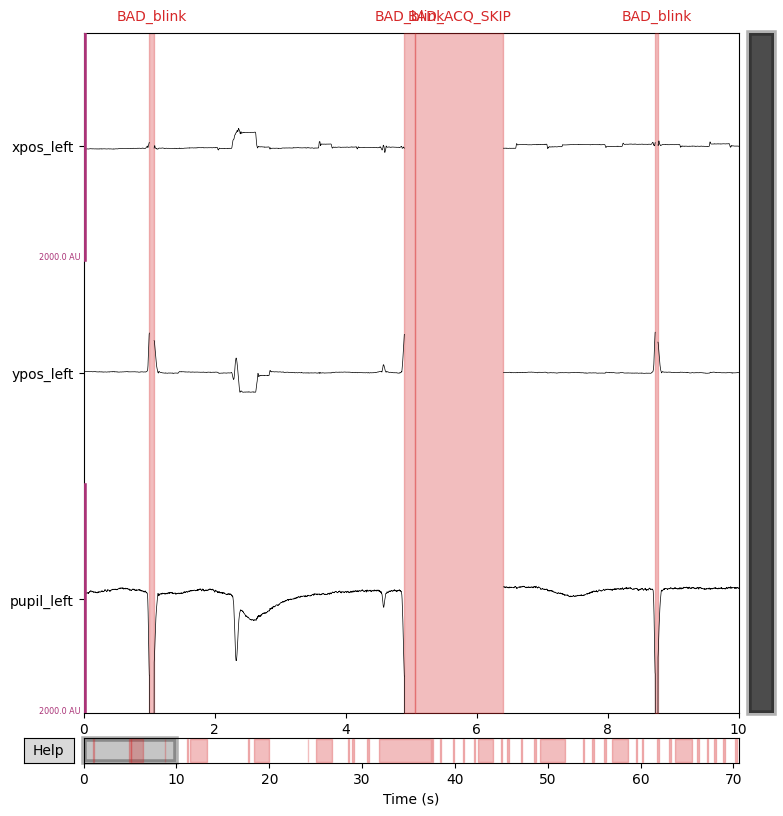

In [12]:
raw = mne.io.read_raw_eyelink(file.path, create_annotations=["blinks"])
custom_scalings = dict(eyegaze=1e3)
raw.pick(picks="eyetrack").plot(scalings=custom_scalings)
plt.close()

In [13]:
raw

Measurement date,"January 01, 2009 00:03:33 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"2 Eye-tracking (Gaze position), 1 Eye-tracking (Pupil size)"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [22]:
raw.ch_names

['xpos_left', 'ypos_left', 'pupil_left']

In [23]:
raw["xpos_left"]

(array([[510.2, 510.1, 509.9, ..., 454.4, 454.8, 455.5]]),
 array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 7.0556e+01, 7.0557e+01,
        7.0558e+01]))